# **SVM 구현하기**

**데이터 생성 및 시각화**

make_moons 함수를 통해 비선형 분류 문제를 위한 2차원 데이터를 생성한다.

make_moons 함수를 통해 생성된 데이터는 초승달 모양을 이룬다.

(200, 2)
(200,)


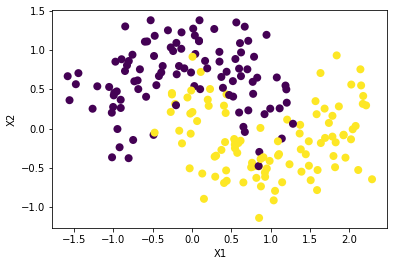

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

# 학습 데이터 생성
x_train, y_train = datasets.make_moons(n_samples = 200, noise = 0.3, random_state = 100)
print(x_train.shape)
print(y_train.shape)

# 데이터 산점도 그리기
plt.scatter(x_train[:, 0], x_train[:, 1], marker = 'o', c = y_train, edgecolor = "face", linewidth = 2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

(200, 2)
(200,)


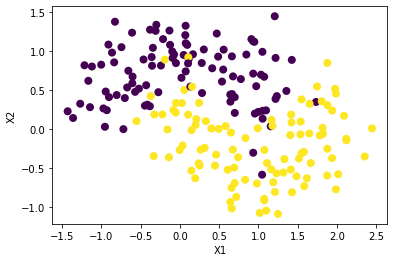

In [2]:
# 테스트 데이터 생성
x_test, y_test = datasets.make_moons(n_samples = 200, noise = 0.3, random_state = 3)
print(x_test.shape)
print(y_test.shape)

plt.scatter(x_test[:, 0], x_test[:, 1], marker = 'o', c = y_test, edgecolor = "face", linewidth = 2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


**SVM 모델 생성 및 학습**

분류를 위한 SVM을 SVC(Support Vector Classification)라 부르기도 한다.

다음 코드를 통해 커널 함수에 따른 SVM의 분류 정확도를 측정하고,

하이퍼 파라미터가 SVM의 분류 성능에 어떤 영향을 미치는지 알아본다.

In [3]:
from sklearn.svm import SVC

svc_model1 = SVC(kernel = 'poly', gamma = 'scale')
svc_model1.fit(x_train, y_train)

# 테스트 데이터로 예측
test_pred = svc_model1.predict(x_test)

print("Classification accuracy on training data : {:.2f}".format(svc_model1.score(x_train, y_train)))
print("Classification accuracy on test data : {:.2f}".format(svc_model1.score(x_test, y_test)))

Classification accuracy on training data : 0.81
Classification accuracy on test data : 0.83


In [4]:
svc_model2 = SVC(kernel = 'linear', gamma = 'scale')
svc_model2.fit(x_train, y_train)

test_pred2 = svc_model2.predict(x_test)

print("Classification accuracy on training data : {:.2f}".format(svc_model2.score(x_train, y_train)))
print("Classification accuracy on test data : {:.2f}".format(svc_model2.score(x_test, y_test)))

Classification accuracy on training data : 0.84
Classification accuracy on test data : 0.86


In [5]:
svc_model3 = SVC(kernel = 'rbf', gamma = 'scale')
svc_model3.fit(x_train, y_train)

test_pred3 = svc_model3.predict(x_test)

print("Classification accuracy on training data : {:.2f}".format(svc_model3.score(x_train, y_train)))
print("Classification accuracy on test data : {:.2f}".format(svc_model3.score(x_test, y_test)))

Classification accuracy on training data : 0.93
Classification accuracy on test data : 0.95


**하이퍼 파라미터(gamma와 C)에 따른 학습 및 테스트 성능 변화**

SVM에서는 각 커널 함수에 따라 조정할 수 있는 하이퍼파라미터가 있다.

앞선 실험에서는 gamma값을 'scale'로 주어 데이터에 따라 자동으로 맞춘 값을 사용하도록 설정했고,

C값은 따로 주지 않아 default인 1값을 사용하였다.

gamma는 학습 데이터의 중요도를 조정하는 값으로, 값이 너무 클 경우 overfitting될 수 있다.

C는 오류의 허용 정도를 조정하는 값으로, 큰 값일수록 오류를 강하게 제한한다는 의미의 hard margin이라 불린다(반대의 경우 soft margin).

다음 코드에서는 rbf 커널에서 gamma와 C값을 다르게 주었을 경우의 성능 변화를 살펴본다.

gamma = 0.01 -> Classification accuracy on training data : 0.820
gamma = 0.01 -> Classification accuracy on test data : 0.820


gamma = 0.05 -> Classification accuracy on training data : 0.840
gamma = 0.05 -> Classification accuracy on test data : 0.850


gamma = 0.1 -> Classification accuracy on training data : 0.840
gamma = 0.1 -> Classification accuracy on test data : 0.860


gamma = 0.5 -> Classification accuracy on training data : 0.900
gamma = 0.5 -> Classification accuracy on test data : 0.935


gamma = 1 -> Classification accuracy on training data : 0.930
gamma = 1 -> Classification accuracy on test data : 0.945


gamma = 2 -> Classification accuracy on training data : 0.920
gamma = 2 -> Classification accuracy on test data : 0.920


gamma = 5 -> Classification accuracy on training data : 0.925
gamma = 5 -> Classification accuracy on test data : 0.920


gamma = 10 -> Classification accuracy on training data : 0.940
gamma = 10 -> Classification accuracy on test data : 0.925




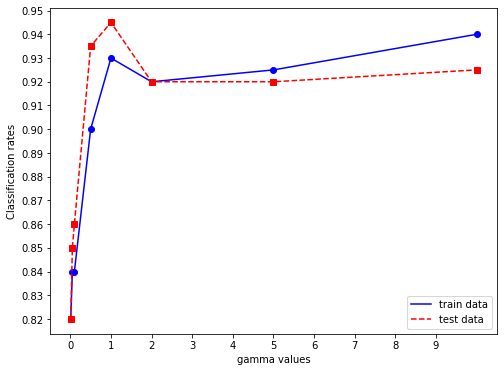

In [7]:
import numpy as np

# gamma 및 분류율 변수 생성
gamma = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]
acclist_train = []
acclist_test = []

# gamma값에 따른 training, test data의 분류율 계산
for gm in gamma:
    svc_model = SVC(kernel = 'rbf', gamma = gm)
    svc_model.fit(x_train, y_train)

    test_pred = svc_model.predict(x_test)

    acc_train = svc_model.score(x_train, y_train)
    acc_test = svc_model.score(x_test, y_test)

    print("gamma = {} -> Classification accuracy on training data : {:.3f}".format(gm, acc_train))
    print("gamma = {} -> Classification accuracy on test data : {:.3f}".format(gm, acc_test))
    print('\n')

    # 계산된 분류율 저장
    acclist_train.append(acc_train)
    acclist_test.append(acc_test)


# 그래프 그리기
plt.figure(figsize = (8,6))
plt.xlabel("gamma values")
plt.ylabel("Classification rates")
plt.xticks(np.arange(0, 10, 1))      # x축 범위 지정 plt.xlim([0, 50])
plt.yticks(np.arange(0.8, 1, 0.01))  # y축 범위 지정 plt.ylim([0, 1])
plt.plot(gamma, acclist_train, 'bo')
plt.plot(gamma, acclist_train, 'b-', label='train data')
plt.plot(gamma, acclist_test, 'rs')
plt.plot(gamma, acclist_test, 'r--', label='test data')
plt.legend()
plt.show()


그래프를 살펴보면 gamma값이 1일 경우 최적의 성능을 가지는 것을 확인할 수 있다.

gamma값이 2를 넘어가면 학습 데이터에 대한 분류율은 높아지는 반면, 테스트 데이터에 대한 분류 정확도는 낮아지는 것으로 보아

학습 데이터에 대한 과적합이 발생한 것을 알 수 있다.

다음은 gamma를 1로 사용하고 C값을 변화시켰을 경우의 성능 변화를 살펴본다.

C = 0.1 -> Classification accuracy on training data : 0.870
C = 0.1 -> Classification accuracy on test data : 0.870


C = 0.2 -> Classification accuracy on training data : 0.890
C = 0.2 -> Classification accuracy on test data : 0.915


C = 0.5 -> Classification accuracy on training data : 0.925
C = 0.5 -> Classification accuracy on test data : 0.950


C = 1 -> Classification accuracy on training data : 0.930
C = 1 -> Classification accuracy on test data : 0.945


C = 2 -> Classification accuracy on training data : 0.920
C = 2 -> Classification accuracy on test data : 0.940


C = 5 -> Classification accuracy on training data : 0.920
C = 5 -> Classification accuracy on test data : 0.925


C = 10 -> Classification accuracy on training data : 0.920
C = 10 -> Classification accuracy on test data : 0.930




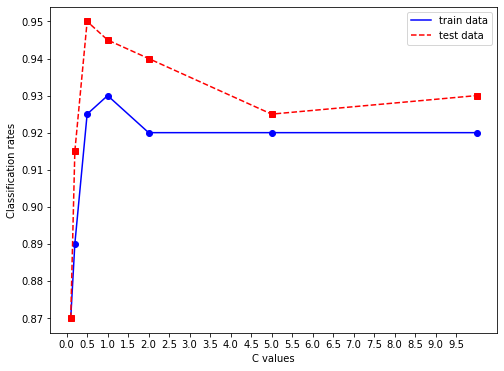

In [8]:
# C 및 분류율 변수 생성
c_val = [0.1, 0.2, 0.5, 1, 2, 5, 10]
acclist_train = []
acclist_test = []

# C 값에 따른 training, test data의 분류율 계산
for c in c_val:
    svc_model = SVC(kernel = 'rbf', gamma = 1, C = c)
    svc_model.fit(x_train, y_train)

    test_pred = svc_model.predict(x_test)

    acc_train = svc_model.score(x_train, y_train)
    acc_test = svc_model.score(x_test, y_test)

    print("C = {} -> Classification accuracy on training data : {:.3f}".format(c, acc_train))
    print("C = {} -> Classification accuracy on test data : {:.3f}".format(c, acc_test))
    print('\n')

    # 계산된 분류율 저장
    acclist_train.append(acc_train)
    acclist_test.append(acc_test)


# 그래프 그리기
plt.figure(figsize = (8,6))
plt.xlabel("C values")
plt.ylabel("Classification rates")
plt.xticks(np.arange(0, 10, 0.5))    # x축 범위 지정 plt.xlim([0, 50])
plt.yticks(np.arange(0.8, 1, 0.01))  # y축 범위 지정 plt.ylim([0, 1])
plt.plot(c_val, acclist_train, 'bo')
plt.plot(c_val, acclist_train, 'b-', label='train data')
plt.plot(c_val, acclist_test, 'rs')
plt.plot(c_val, acclist_test, 'r--', label='test data')
plt.legend()
plt.show()


그래프를 보면 C값이 0.5~1 사이의 값일 때 가장 좋은 성능을 보임을 알 수 있다. 

C와 gamma는 데이터에 따라 최적의 값이 달라지므로 실험을 통해 찾아야 한다.

**Tip : 결정경계 그리기 라이브러리**

앞서 학습한 SVM모델 'svc_model3'의 결정경계를 라이브러리를 통해 손쉽게 그려 본다.

mlxtend과 mglearn를 사용하여 쉽게 결정경계를 그릴 수 있으며, 코랩에서 mglearn은 기본으로 제공하지 않기 때문에 따로 설치한다. 

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


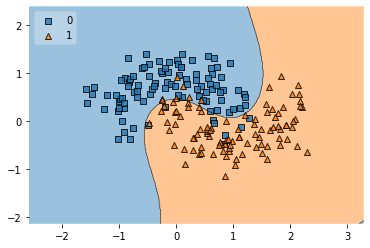

In [9]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X = x_train, y = y_train, clf = svc_model3, legend = 2)

In [10]:
!pip install mglearn

     |████████████████████████████████| 540 kB 24.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=8640116fa25b2c6e49842bf1446b6953df0dcfac5ba2351d963010f0809e9737
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


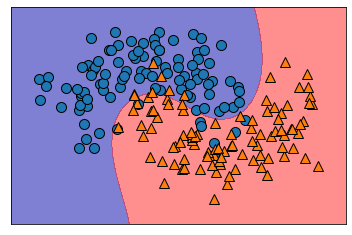

In [12]:
import mglearn

mglearn.plots.plot_2d_separator(svc_model3, x_train, fill=True, alpha = 0.5)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)